In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('MFG10YearTerminationData.csv')

In [3]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [5]:
df.isna().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

We want first to convert all the date object into Datetime

In [10]:
df['recorddate_key'] =  pd.to_datetime(df['recorddate_key'], infer_datetime_format=True)

In [11]:
df['birthdate_key'] =  pd.to_datetime(df['birthdate_key'], infer_datetime_format=True)
df['orighiredate_key'] =  pd.to_datetime(df['orighiredate_key'], infer_datetime_format=True)
df['terminationdate_key'] =  pd.to_datetime(df['terminationdate_key'], infer_datetime_format=True)

In [12]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,churn
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,1
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,1
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,1
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,1
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,1


In [13]:
df.terminationdate_key

0       1900-01-01
1       1900-01-01
2       1900-01-01
3       1900-01-01
4       1900-01-01
           ...    
49648   2015-12-30
49649   2013-08-30
49650   2015-12-30
49651   2013-12-31
49652   2014-12-30
Name: terminationdate_key, Length: 49653, dtype: datetime64[ns]

Creation of a new column that say if the employee is still in the company 

In [14]:
import datetime 
df['churn'] = df['terminationdate_key'].apply(lambda x : '0' if x == datetime.date(1900,1,1) else 1) 

In [15]:
df.head(50)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,churn
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,0
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,0
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,0
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,0
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,0
5,1318,2011-12-31,1954-01-03,1989-08-28,1900-01-01,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE,0
6,1318,2012-12-31,1954-01-03,1989-08-28,1900-01-01,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE,0
7,1318,2013-12-31,1954-01-03,1989-08-28,1900-01-01,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE,0
8,1318,2014-12-31,1954-01-03,1989-08-28,1900-01-01,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE,0
9,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,0


Changing gender into binary data 

In [16]:
df.gender_full = df.gender_full.apply(lambda x : 1 if x == 'Male' else 0)

Dropping some columns 

In [17]:
cols = ['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key', 
        'terminationdate_key', 'city_name', 'job_title','department_name', 'gender_short', 'STATUS',
        'termreason_desc', 'termtype_desc']

df.drop(cols, axis=1, inplace=True)

In [18]:
df

,age,length_of_service,store_name,gender_full,STATUS_YEAR,BUSINESS_UNIT,churn
0,52,17,35,1,2006,HEADOFFICE,0
1,53,18,35,1,2007,HEADOFFICE,0
2,54,19,35,1,2008,HEADOFFICE,0
3,55,20,35,1,2009,HEADOFFICE,0
4,56,21,35,1,2010,HEADOFFICE,0
...,...,...,...,...,...,...,...
49648,21,2,34,1,2015,STORES,1
49649,19,0,44,0,2013,STORES,1
49650,21,2,39,0,2015,STORES,1
49651,19,0,16,0,2013,STORES,1


In [19]:
df.BUSINESS_UNIT = df.BUSINESS_UNIT.apply(lambda x : 1 if x == 'HEADOFFICE' else 0)

In [20]:
df.head()

,age,length_of_service,store_name,gender_full,STATUS_YEAR,BUSINESS_UNIT,churn
0,52,17,35,1,2006,1,0
1,53,18,35,1,2007,1,0
2,54,19,35,1,2008,1,0
3,55,20,35,1,2009,1,0
4,56,21,35,1,2010,1,0


In [21]:
df.churn = df.churn.astype('int64')

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

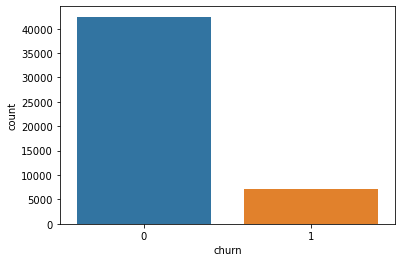

In [23]:
sns.countplot('churn', data=df)

We will need to stratify y

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)

### Regression linéaire

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=0) 

parameters =  [{'penalty' : ['l1', 'l2'],
                'C' : np.logspace(-4, 4, 20),
                'solver' : ['liblinear']}
              ]                             #C'est un copier/coller, dur de comprendre... à creuser pour la prez

logreg_cv = GridSearchCV(classifier,
                           param_grid = parameters,
                           scoring = 'f1',   
                           cv = kfold,         
                           n_jobs = -1)    # Permet de faire tourner le pc au max

logreg_cv.fit(X_train, y_train)
best_f1 = logreg_cv.best_score_
best_parameters = logreg_cv.best_params_
best_std = logreg_cv.cv_results_['std_test_score'].mean()
print("Best f1: {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)
print("Best Std:{:.2f} %".format(best_std*100))

KeyboardInterrupt: 

In [75]:
classifier_opt = LogisticRegression(C=0.012742749857031334, penalty ='l1', solver='liblinear')
classifier_opt.fit(X_train, y_train)

LogisticRegression(C=0.012742749857031334, penalty='l1', solver='liblinear')

In [76]:
#On crée les variables de prédictions sur le set Train et Test 
y_test_pred = classifier_opt.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
test_score = f1_score(y_test, y_test_pred)
print("Le f1 score du modèle Logistic Regression opt est: {:.2f} %".format(test_score*100))

[[8487    3]
 [ 876  565]]
Le f1 score du modèle Logistic Regression opt est: 56.25 %


In [78]:
# Tableau récap qu'on va alimenter au fur et à mesure que l'on teste nos modèles 
results_df_opt = pd.DataFrame(data=[["Logistic Regression", round(best_f1*100, 2), round(best_std*100, 2), round(test_score*100, 2)]], 
                          columns=['Model', 'Training f1 opt %', 'Std % opt', 'Test f1 % opt'])
results_df_opt

,Model,Training f1 opt %,Std % opt,Test f1 % opt
0,Logistic Regression,57.27,2.53,56.25


### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(random_state=0)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [80]:
from sklearn.model_selection import RandomizedSearchCV

kfold = KFold(n_splits=5, shuffle=True, random_state=0) 

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

    
rand_search = GridSearchCV(estimator=rand_forest, param_grid=param_grid,scoring='f1', cv= kfold)

rand_search.fit(X_train, y_train) 
best_f1 = rand_search.best_score_
best_parameters = rand_search.best_params_
best_std = rand_search.cv_results_['std_test_score'].mean()

print("Best f1 score: {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)
print("Best Std: {:.2f} %".format(best_std*100))

Best f1 score: 71.89 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Best Std: 1.16 %


In [82]:
rand_forest_opt = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 'auto', n_estimators= 500)
rand_forest_opt.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)

In [83]:
#On crée les variables de prédictions sur le set Train et Test 
y_test_pred = rand_forest_opt.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
test_score = f1_score(y_test, y_test_pred)
print("Le score f1 du modèle Random Forest opt est: {:.2f} %".format(test_score*100))

[[8490    0]
 [ 625  816]]
Le score f1 du modèle Random Forest opt est: 72.31 %


In [85]:
# Tableau récap qu'on va alimenter au fur et à mesure que l'on teste nos modèles 
results_df_opt2 = pd.DataFrame(data=[["Random Forest Classifier", round(best_f1*100, 2), round(best_std*100, 2), round(test_score*100, 2)]], 
                          columns=['Model', 'Training f1 opt %', 'Std % opt', 'Test f1 % opt'])

results_df_opt = results_df_opt.append(results_df_opt2, ignore_index=True)
results_df_opt

,Model,Training f1 opt %,Std % opt,Test f1 % opt
0,Logistic Regression,57.27,2.53,56.25
1,Random Forest Classifier,71.89,1.16,72.31


### XGBOOST

In [34]:
from xgboost import XGBClassifier
xclass = XGBClassifier(random_state = 0)
xclass.fit(X_train, y_train)


[15:46:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)   # 5 au lieu de 10 car ca mouline déjà fort à 10...

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xclass_cv = RandomizedSearchCV(xclass, param_distributions=params,
                               n_iter=1000,scoring='f1',
                               cv= kfold,verbose=3, n_jobs =-1 )

xclass_cv.fit(X_train, y_train)
best_f1 = xclass_cv.best_score_
best_parameters = xclass_cv.best_params_
best_std = xclass_cv.cv_results_['std_test_score'].mean()

print("Best f1: {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)
print("Best Std: {:.2f} %".format(best_std*100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 405 is smaller than n_iter=1000. Running 405 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 10.3min finished


[15:56:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best f1: 88.83 %
Best Parameters: {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 1.0}
Best Std: 0.30 %


In [36]:
xclass_opt = XGBClassifier(subsample= 1, min_child_weight= 1, max_depth= 5, gamma= 2, colsample_bytree= 1)
xclass_opt.fit(X_train, y_train)

[15:56:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
#On crée les variables de prédictions sur le set Train et Test 
y_test_pred = xclass_opt.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
test_score = f1_score(y_test, y_test_pred)
print("Le score f1 du modèle XGBoost opt est: {:.2f} %".format(test_score*100))


[[8488    2]
 [ 291 1150]]
Le score f1 du modèle XGBoost opt est: 88.70 %


In [40]:
# Tableau récap qu'on va alimenter au fur et à mesure que l'on teste nos modèles 
results_df_opt2 = pd.DataFrame(data=[["XGBoost Classifier", round(best_f1*100, 2), round(best_std*100, 2), round(test_score*100, 2)]], 
                          columns=['Model', 'Training f1 opt %', 'Std % opt', 'Test f1 % opt'])

results_df_opt = results_df_opt.append(results_df_opt2, ignore_index=True)
results_df_opt

NameError: name 'results_df_opt' is not defined